<a href="https://colab.research.google.com/github/marionb/BFH_AI/blob/main/20221001_Homework_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2
## Training a  square  function

$f(x) = m*x^2 - b$

Derivatives to be used for the MSE calculation:

$g(m,b)=(Y_i−f(x))^2 = (Y_i - (mx^2-b))^2$

- $\frac{\partial g}{\partial m} = -2x^2(Y_i - (mx^2-b))$

- $\frac{\partial g}{\partial b} = 2(Y_i - (mx^2-b))$

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcdefaults()
from pylab import rcParams
%matplotlib inline

In [ ]:
def update_weights(m, b, X, Y, learning_rate):
    '''
    function to update: w_new = w_old - dL/dw * LearningRate with L=MSE
    '''
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    # Ableitung MSE
    for i in range(N): # pytorch - backward # gradient tape
        # Calculate partial derivatives
        # -x (innere Ableitung) * 2(y - (a*x^2 + b)) (äussere Ableitung)
        m_deriv += -2*X[i]**2 * (Y[i] - (m*X[i]**2 - b)) 

        # -2(y - (mx + b))
        b_deriv += 2*(Y[i] - (m*X[i]**2 - b))
        

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate # später - in pytorch step
    b -= (b_deriv / float(N)) * learning_rate
    history_m.append(m)
    history_b.append(b)
    
    return m,b


In [ ]:
X = np.linspace(0,1, num = 100)
m = 5
b = 7
Y = [m*x**2 - b for x in X]

In [ ]:
def train(epochs):
    m=0
    b=0
    learning_rate=0.01
    for i in range(epochs):
        # abbruchskriterium - "early stopping"
        m,b = update_weights(m, b, X, Y, learning_rate)
    return m,b

In [ ]:
history_m = []
history_b = []
epochs = 10000
train(epochs)

(4.9999993835739485, 6.999999775305488)

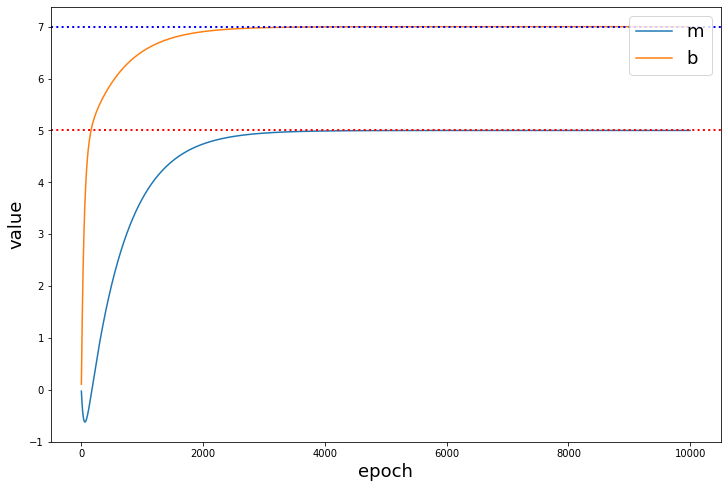

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_m[0:epochs])
plt.plot(history_b[0:epochs])

plt.ylabel('value',fontsize= 18)
plt.xlabel('epoch',fontsize= 18)
plt.legend(['m', 'b'], loc='upper right', fontsize= 18)
plt.axhline(y=5, xmin=0, xmax=epochs, c='r', linewidth=2,linestyle=':')
plt.axhline(y=7, xmin=0, xmax=epochs, c='b', linewidth=2, linestyle=':');

## Training a $log$ function

$f(x) = m * log(x) + b$

### Derivatives to be used for the MSE calculation:

$g=(Y_i - f(x))^2 = (Y_i - (m*log(X_i) +b))^2$

- $ \frac{\partial g}{\partial m} = -2log(X_i)*(Y_i-(m * log(X_i) + b))$

- $ \frac{\partial g}{\partial b} = -2(Y_i - (m * log(x) + b))$

In [ ]:
m = 5 # m
b = 7 # b 
#Use a large range of x values to capture the full extent of what a log funcion does. small numbers to big numbers
X_log = np.linspace(1,500, num = 1000)

Y_log = [m * np.log(x) + b for x in X_log] # Define the function f(x) = y

In [ ]:
def update_weights_log(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    # Ableitung MSE
    for i in range(N): # pytorch - backward # gradient tape
        # Calculate partial derivatives
        m_deriv += -2*np.log(X[i]) * (Y[i] - (m*np.log(X[i]) + b)) 
        b_deriv += -2*(Y[i] - (m*np.log(X[i])) + b)
        

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate # später - in pytorch step
    b -= (b_deriv / float(N)) * learning_rate
    history_m.append(m)
    history_b.append(b)
    
    return m,b

def train(epochs):
    m=0.11
    b=0.2
    learning_rate=0.0001
    for i in range(epochs):
        # abbruchskriterium - "early stopping"
        m,b = update_weights_log(m, b, X_log, Y_log, learning_rate)
    return m,b

In [ ]:
history_m = []
history_b = []
epochs = 1000
train(epochs)

(5.956467281496045, 1.8600622567697265)

In [ ]:
history_m[10]

0.4809566108794476

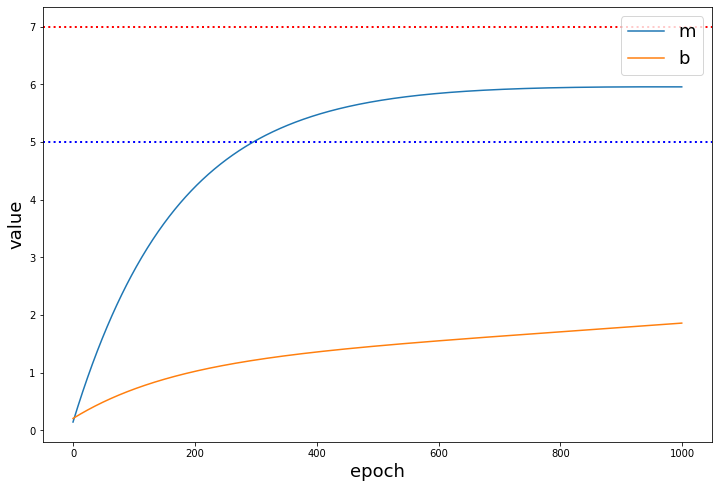

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_m[0:epochs])
plt.plot(history_b[0:epochs])

plt.axhline(y=7, xmin=0, xmax=epochs, c='r', linewidth=2,linestyle=':') # b
plt.axhline(y=5, xmin=0, xmax=epochs, c='b', linewidth=2, linestyle=':') # m
plt.ylabel('value',fontsize= 18)
plt.xlabel('epoch',fontsize= 18)
plt.legend(['m', 'b'], loc='upper right', fontsize= 18);

# Homework 1

## Train a linear function in two dimensions ($f \in \Re ^2$)

$f(x,y) = ax + by +c$

$g(a,b,c) = (Z_i - (f(x,y))^2 = (Z_i- (aX_i + bY_i +c))^2$

- $\frac{\partial g}{\partial a} = -2x(Z_i- (aX_i + bY_i +c))$

- $\frac{\partial g}{\partial b} = -2y(Z_i- (aX_i + bY_i +c))$

- $\frac{\partial g}{\partial c} = 2(Z_i- (aX_i + bY_i +c))$

In [ ]:
X_1 = [(i-1)/100 for i in np.random.randint(1, 100, size = 10)]
X_2 = [(i-1)/100 for i in np.random.randint(1, 100, size = 10)]

a= 3
b= 4
c= 6
Y = [a * x_1 + b * x_2 +c for x_1, x_2 in zip(X_1, X_2)]

print(Y)

[10.64, 8.120000000000001, 6.83, 10.25, 9.98, 9.0, 10.76, 8.76, 12.7, 12.42]


In [ ]:
history_a = []
history_b = []
history_c = []

def update_weights_linear(a, b, c, X_1, X_2, Y, learning_rate):
    a_deriv = 0
    b_deriv = 0
    c_deriv = 0
    N = len(X_1)
    # Ableitung MSE
    for i in range(N): # pytorch - backward # gradient tape
        a_deriv += -2*X_1[i]*(Y[i] - (a*X_1[i] + b* X_2[i]+c)) 
        b_deriv += -2*X_2[i]*(Y[i] - (a*X_1[i] + b* X_2[i]+c)) 
        c_deriv += -2*(Y[i] - (a*X_1[i] + b* X_2[i]+c))
        

    # We subtract because the derivatives point in direction of steepest ascent
    a -= (a_deriv / float(N)) * learning_rate # später - in pytorch step
    b -= (b_deriv / float(N)) * learning_rate
    c -= (c_deriv / float(N)) * learning_rate
    history_a.append(a)
    history_b.append(b)
    history_c.append(c)
    
    return a,b,c

def train(epochs):
    a=1
    b=1
    c=1
    learning_rate=0.01
    for i in range(epochs):
        # abbruchskriterium - "early stopping"
        a,b,c = update_weights_linear(a, b, c, X_1, X_2, Y, learning_rate)
    return a,b,c

In [ ]:
epochs = 10000
train(epochs)

(3.005601993647875, 3.9925645690659946, 6.001527800506582)

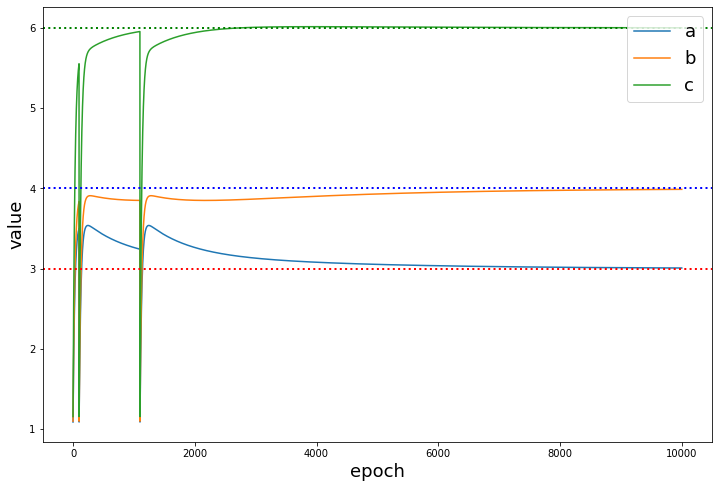

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_a[0:epochs])
plt.plot(history_b[0:epochs])
plt.plot(history_c[0:epochs])

plt.axhline(y=3, xmin=0, xmax=epochs, c='r', linewidth=2,linestyle=':') # a
plt.axhline(y=4, xmin=0, xmax=epochs, c='b', linewidth=2, linestyle=':') # b
plt.axhline(y=6, xmin=0, xmax=epochs, c='g', linewidth=2, linestyle=':') # c
plt.ylabel('value',fontsize= 18)
plt.xlabel('epoch',fontsize= 18)
plt.legend(['a', 'b', 'c'], loc='upper right', fontsize= 18);